<img src='https://images.unsplash.com/photo-1501594907352-04cda38ebc29?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8c2FuJTIwZnJhbmNpc2NvfGVufDB8fDB8fA%3D%3D&w=1000&q=80'>

# Introduction
**How can Airbnb outearn tranditional renting?**

Set in San Francisco city, this project is targeted at real estate investors who might be wondering if listing their properties with Airbnb would earn more than renting to a long-term renter.

For this analysis, an Airbnb listing is deemed more lucrative if it earns more income per year than a 12-month rent.

The question is answered by analyzing the **`listings`** and **`calendar`** datasets made available by the courtesy of [Inside Airbnb](http://insideairbnb.com/get-the-data), along with the Zillow Observed Rent Index ([ZORI](https://www.zillow.com/research/data/)), a smoothed measure of the typical observed market rate rent across a given region.

The main success metric is **total revenue,** calculated by multiplying average daily rate by occupied rooms. *Note:* revenue does not consider expenses, so it can’t give a true picture of profitability and operating success.

Other variables needed for this analysis:
- **Popularity/Frequency of stays:** `number_of_reviews` are categorized into five bins:
  
    - 0-10 reviews: *New*
    - 11-25 reviews: *Rising* 
    - 26-50 reviews: *Trending*
    - 51-100 reviews: *Popular* 
    - 100+ reviews: *Hot*
- **Occupancy rate:** The percentage of occupied rooms, calculated by dividing the total number of rooms occupied, by the total number of `availability_365`, times 100.

# Data Exploration

## Import Libraries and Datasets

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd
import gzip

# Import libraries for data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Import other libraries
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.0f}'.format

In [ ]:
# Where to save the figures
import os
from os import path

PROJECT_ROOT_DIR = "/content/drive/MyDrive/Data Science - Midterm Project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    This function receives a figure title and returns the figure saved in a designated folder.
    The default setting creates a png file of resolution 300 with tight layout.
    There is a notification telling you that the figure is being saved.
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Download listings dataset
# ! wget 'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-06-03/data/listings.csv.gz' -P '/content/drive/MyDrive/Data Science - Midterm Project/SF'

# Download calendar dataset
# ! wget 'http://data.insideairbnb.com/united-states/ca/san-francisco/2022-06-03/data/calendar.csv.gz' -P '/content/drive/MyDrive/Data Science - Midterm Project/SF'

# Import datasets
with gzip.open('/content/drive/MyDrive/Data Science - Midterm Project/data/listings.csv.gz') as listings:
    listings = pd.read_csv(listings)

with gzip.open('/content/drive/MyDrive/Data Science - Midterm Project/data/calendar.csv.gz') as calendar:
    calendar = pd.read_csv(calendar)
    
with open('/content/drive/MyDrive/Data Science - Midterm Project/data/City_zori_sm_month.csv') as rentals:
    rentals = pd.read_csv(rentals)

## *listings* Dataset

In [ ]:
print("This dataset consists of {} observations and {} features. \n".format(listings.shape[0], listings.shape[1]))

print("There are {} numerical features such as {}... \n".format(len(listings.select_dtypes(['float', 'int']).columns),
                                                                ", ".join(list(listings.select_dtypes(['float', 'int']).columns)[0:5])))

print("There are {} categorical features such as {}... \n".format(len(listings.select_dtypes(['object']).columns),
                                                                  ", ".join(list(listings.select_dtypes(['object']).columns)[0:5])))

This dataset consists of 6444 observations and 74 features. 

There are 40 numerical features such as id, scrape_id, host_id, host_listings_count, host_total_listings_count... 

There are 34 categorical features such as listing_url, last_scraped, name, description, neighborhood_overview... 



In [ ]:
# Select the categorical features
cat_attribs = listings.select_dtypes(include=['object'])
cat_attribs = cat_attribs[cat_attribs.columns]

# Create a table of missing categorical data with percentage
cat_null_total = cat_attribs.isnull().sum().sort_values(ascending=False)
cat_null_pct = (cat_attribs.isnull().sum() / cat_attribs.isnull().count() * 100).sort_values(ascending=False)
cat_nulls = pd.concat([cat_null_total, cat_null_pct], axis=1, keys=['nulls', '% of nulls']).reset_index().rename(columns={'index':'categorical attributes'})
cat_nulls.head(10)

,categorical attributes,nulls,% of nulls
0,license,2724,42
1,host_about,1993,31
2,neighbourhood,1807,28
3,neighborhood_overview,1807,28
4,last_review,1177,18
5,first_review,1177,18
6,host_response_rate,853,13
7,host_response_time,853,13
8,host_acceptance_rate,693,11
9,host_neighbourhood,402,6


In [ ]:
# Select the numerical features
num_attribs = listings.select_dtypes(include=['float64', 'int64'])
num_attribs = num_attribs[num_attribs.columns]

# Create a table of missing numerical data with percentage
num_null_total = num_attribs.isnull().sum().sort_values(ascending=False)
num_null_pct = (num_attribs.isnull().sum() / num_attribs.isnull().count() * 100).sort_values(ascending=False)
num_nulls = pd.concat([num_null_total, num_null_pct], axis=1, keys=['nulls', '% of nulls']).reset_index().rename(columns={'index':'numerical attributes'})
num_nulls.head(10)

,numerical attributes,nulls,% of nulls
0,calendar_updated,6444,100
1,neighbourhood_group_cleansed,6444,100
2,bathrooms,6444,100
3,review_scores_value,1199,19
4,review_scores_location,1199,19
5,review_scores_checkin,1199,19
6,review_scores_communication,1198,19
7,review_scores_cleanliness,1198,19
8,review_scores_accuracy,1198,19
9,review_scores_rating,1177,18


In [ ]:
# Manipulation of listings dataset

# Drop unnecessary columns 
cleaned_listings = listings[['id', 'neighbourhood_cleansed', 'host_id', 'host_since',
                             'room_type', 'price', 'availability_365', 'number_of_reviews']]

# Convert price column to numeric data type
cleaned_listings['price'] = cleaned_listings['price'].replace('\$|,', '', regex=True)
cleaned_listings['price'] = pd.to_numeric(cleaned_listings['price'])

# Rename column(s)
cleaned_listings.rename(columns={'neighbourhood_cleansed':'neighborhood'}, inplace=True)

# Convert host_since column to datetime data type
cleaned_listings['host_since'] = pd.to_datetime(cleaned_listings['host_since'])

# Create new features 
cleaned_listings['popularity'] = cleaned_listings['number_of_reviews'].apply(lambda x: 
                                                                             'New (0-10)' if x <= 10 
                                                                             else 'Rising (11-25)' if x <= 25
                                                                             else 'Trending (26-50)' if x <= 50
                                                                             else 'Popular (51-100)' if x <= 100
                                                                             else 'Hot (100+)')
cleaned_listings['occupancy_rate'] = (1 - cleaned_listings['availability_365'] / 365) * 100
cleaned_listings['total_revenue'] = cleaned_listings['price'] * (365 - cleaned_listings['availability_365'])

# Filter for apartments only
cleaned_listings = cleaned_listings[cleaned_listings['room_type'] != 'Hotel room']

# Show info
cleaned_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6380 entries, 0 to 6443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 6380 non-null   int64         
 1   neighborhood       6380 non-null   object        
 2   host_id            6380 non-null   int64         
 3   host_since         6356 non-null   datetime64[ns]
 4   room_type          6380 non-null   object        
 5   price              6380 non-null   float64       
 6   availability_365   6380 non-null   int64         
 7   number_of_reviews  6380 non-null   int64         
 8   popularity         6380 non-null   object        
 9   occupancy_rate     6380 non-null   float64       
 10  total_revenue      6380 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 598.1+ KB


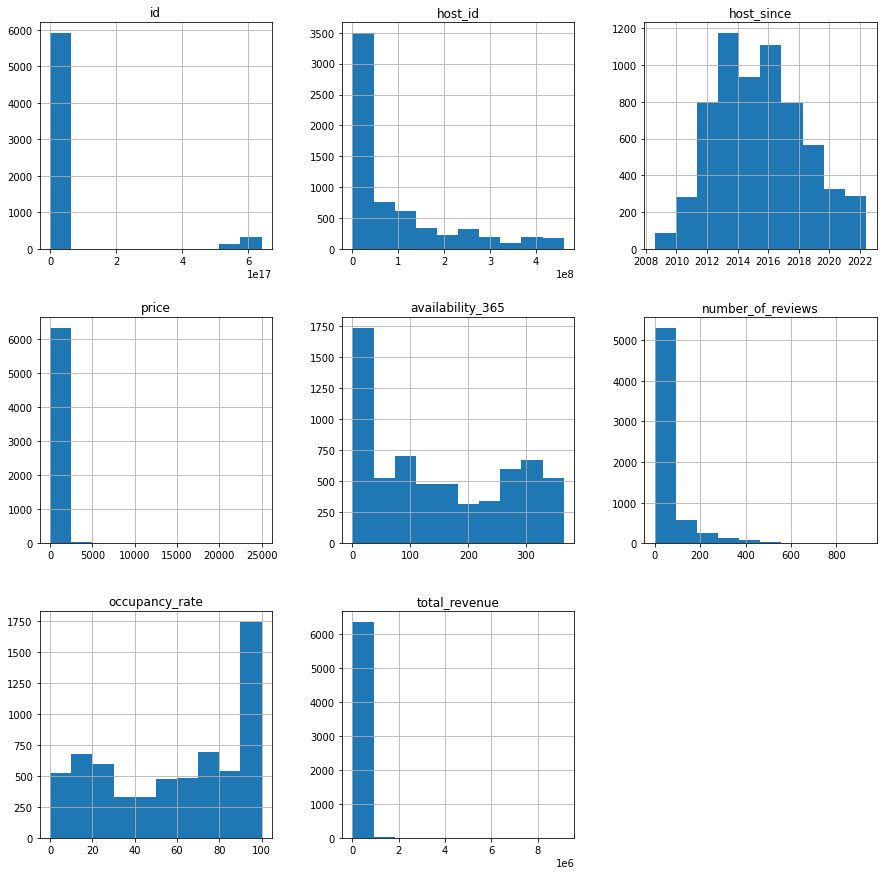

In [ ]:
cleaned_listings.hist(figsize=(15,15))

plt.show()

## *rentals* Dataset

In [ ]:
# Manipulation of rentals dataset

# Drop unneccessary columns
cleaned_rentals = rentals.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'])

# Melt the table
melted_rentals = pd.melt(cleaned_rentals,
                         id_vars=cleaned_rentals.columns[:1],
                         value_vars=cleaned_rentals.columns[1:],
                         var_name='date',
                         value_name='avg_rent')

# Select San Francisco 
sf_rentals = melted_rentals[melted_rentals['RegionName'] == 'San Francisco']

# Fill nan values
sf_rentals['avg_rent'].fillna(sf_rentals['avg_rent'].mean(), inplace=True)

# Convert date column to datetime datatype
sf_rentals['date'] = pd.to_datetime(sf_rentals['date'])
sf_rentals = sf_rentals[(sf_rentals['date'] > '2021-05-31') & (sf_rentals['date'] < '2022-07-31')]

sf_rentals.drop(columns=['RegionName'], inplace=True)

In [ ]:
sf_rentals.to_csv('sf_rentals.csv')

## *calendar* Dataset

In [ ]:
# Manipulation of calendar dataset

# Convert price column to numeric data type
calendar['price'] = calendar['price'].replace('\$|,', '', regex=True)
calendar['price'] = pd.to_numeric(calendar['price'])

# Convert date column to datetime data type
calendar['date'] = pd.to_datetime(calendar['date'])

# Drop unnecessary columns
cleaned_calendar = calendar[['listing_id', 'date', 'available', 'price',]]

# Data Analysis

## Overview

*NOTE:* It is important to identify and handle extreme outliers that might affect the mean, in this case, uncommonly expensive listings by their average daily rate.

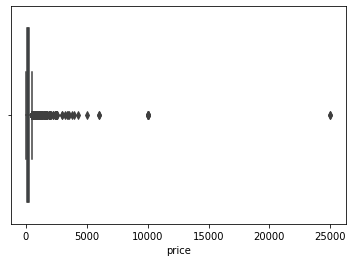

In [ ]:
# Plot price distribution 
sns.boxplot(data=cleaned_listings, x='price')

plt.show()

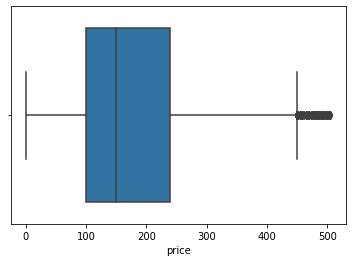

In [ ]:
# Use IQR method to detect price outliers
q1 = cleaned_listings['price'].quantile(.25)
q3 = cleaned_listings['price'].quantile(.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Eliminate outliers
outliers_removed = cleaned_listings[~((cleaned_listings['price'] < lower) | 
                                      (cleaned_listings['price'] > upper))]

# Revisit the boxplot after outlier removal
sns.boxplot(data=outliers_removed, x='price')

plt.show()

**How many rentals?**

With extreme outliers removed, Airbnb had 5,910 properties listed in the city. More than half — 3,792 — were entire houses or apartments. Of the remainder, 2,046 were private rooms and 72 were shared rooms.

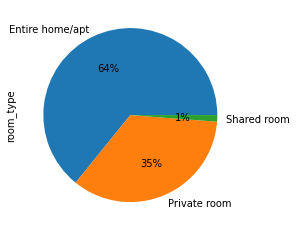

In [ ]:
# Plot room type 
outliers_removed['room_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()

**How popular / often?**

For this analysis, like a bread-crumb trail, reviews left by visitors offer some insights on popularity / frequency of bookings. 

More than half of properties had 0 to 10 reviews, fitting Airbnb’s portrayal of occasional use. Almost a quarter, with 11 to 50 reviews, were busier. A total of 1,566 properties had 51 or more reviews, implying heavy or constant visitor traffic.

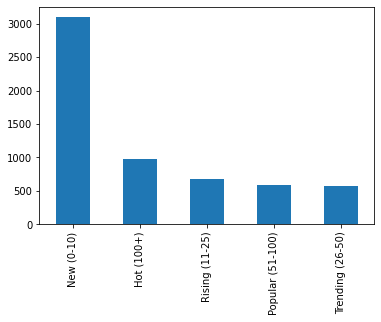

In [ ]:
# Plot proportion of popularity 
outliers_removed['popularity'].value_counts().plot(kind='bar')

plt.show()

**Year-over-year growth**

Citywide year-on-year growth of Airbnb available listings per month has been on a downward trend since 2016. For example, Airbnb available listings in that year grew around 38 percent, while in 2017, it had slowed to 50 percent.

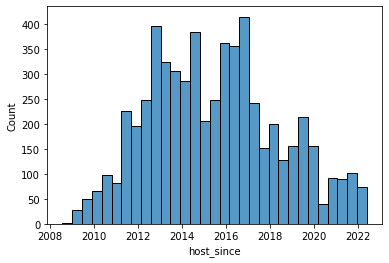

In [ ]:
# Plot superhosts and their experience
sns.histplot(outliers_removed, x='host_since')

plt.show()

## Airbnb vs Traditional Renting 

We will benchmark against the mean of San Francisco's rents between June 2022 and June 2023 to relatively assess Airbnb's profitability in the same period, a year into the future. An Airbnb rental is considered lucrative should its annual revenue be more than the sum of San Francisco's 12-month rents.

### Analysis #1: Have a goal to maximize occupancy rate and daily rate based on

In San Francisco, the average apartment rents of \$3,473 a month, according to June 2022 data, represents \$45,149 gross income if the tenant signed a 12-month lease.

According to the analysis, 1,864 Airbnb listings earn over \$45,149 a year, meaning there is a 32 percent chance an Airbnb renting will be more lucrative than a long-term let. But it requires \$90 more of the average rate and a 26 percent increase in the occupancy rate to 92 percent.

In other words, an Airbnb rental needs to make \$240 per night for a total of 337 nights in order to rake in **\$80,880 a year, almost doubling the income of traditional renting.**

Total monthly rent: 45149.40924469632


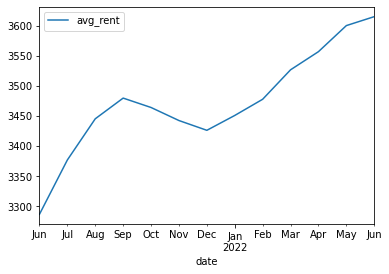

In [ ]:
sf_rentals.set_index('date', inplace=True)
print('Total monthly rent:', sf_rentals.values.sum())
sf_rentals.plot()

plt.show()

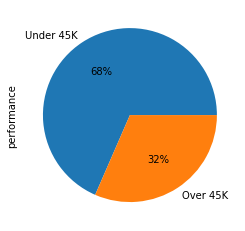

In [ ]:
# Filter for listings earning greater revenue than a year worth of traditional renting 
outliers_removed['performance'] = outliers_removed['total_revenue'] > sf_rentals['avg_rent'].values.sum()
outliers_removed.loc[outliers_removed['performance'] == True, 'performance'] = 'Over 45K'
outliers_removed.loc[outliers_removed['performance'] == False, 'performance'] = 'Under 45K'

# Plot probability of an Airbnb giving double the income of a long-term rent
outliers_removed['performance'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()

In [ ]:
over_45K = outliers_removed[outliers_removed['performance'] == 'Over 45K']

print(f'There is a {round(len(over_45K) / len(outliers_removed) * 100)} percent chance an Airbnb will be more lucrative than a long-term let.')

# Calculate mean price
print('Mean price:', over_45K['price'].median())

# Calculate mean occupancy rate
print('Mean occupancy rate:', over_45K['occupancy_rate'].median())

# Calculate annual mean number of rentals
print('Mean number of rentals:', over_45K['occupancy_rate'].median() * 365 / 100)

# Calculate mean annual revenue
print ('Mean annual revenue:', over_45K['price'].median() * (over_45K['occupancy_rate'].median() * 365 / 100))

There is a 32 percent chance an Airbnb will be more lucrative than a long-term let.
Mean price: 240.0
Mean occupancy rate: 92.32876712328768
Mean number of rentals: 337.0
Mean annual revenue: 80880.0


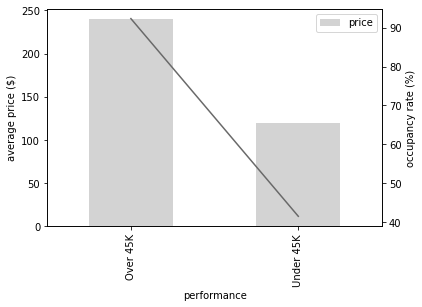

In [ ]:
# Plot price and occupancy rate
plot_data = outliers_removed.groupby('performance')['price', 'occupancy_rate'].median()

fig, ax = plt.subplots()

ax = plot_data['price'].plot(kind='bar', color='lightgrey')
ax.set_ylabel('average price ($)')
ax.legend(loc='best')

ax2 = ax.twinx()

ax2.plot(plot_data['occupancy_rate'], color='dimgrey')
ax2.set_ylabel('occupancy rate (%)')

plt.show()

### Analysis #2: Mitigate cash flow problems and market extensively for off-season

With an average occupancy rate of 66 percent, Airbnb rentals may be far more inconsistent than a long-term lease. You are likely to have more vacant dates on your calendar, starting from July until November.

While top performers consistently earn roughly $7,500 per month on average, the other group has dwindling income. Your monthly revenue may fall below the average threshold and essentially lead to lower total income.

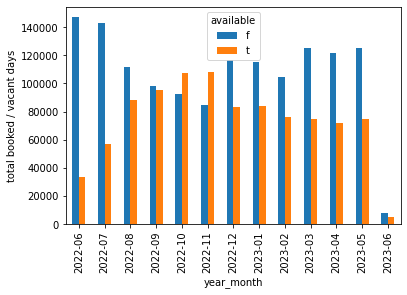

In [ ]:
# Group availability status by month
cleaned_calendar['year_month'] = pd.to_datetime(cleaned_calendar['date']).dt.to_period('M')
availability = cleaned_calendar.groupby('year_month')['available'].value_counts().unstack()

availability.plot(kind='bar')
plt.ylabel('total booked / vacant days')

plt.show()

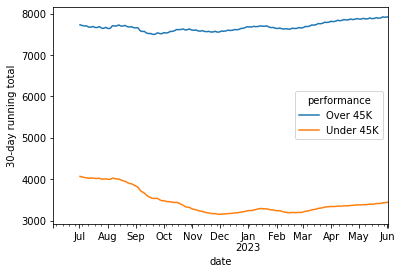

In [ ]:
# Filter calendar for listings in over_45K that are already booked
to_filter = outliers_removed['id'].unique().tolist()
seasonality = cleaned_calendar[(cleaned_calendar['listing_id'].isin(to_filter)) &
                               (cleaned_calendar['available'] == 'f')]

# Drop listings with abnormal price
to_drop = seasonality[seasonality['price'] > 5000]['listing_id'].unique().tolist()
seasonality.drop(seasonality[seasonality['listing_id'].isin(to_drop)].index, axis=0, inplace=True)

# Give listings their popularity label
over_45K_list = outliers_removed[outliers_removed['performance'] == 'Over 45K']['id'].unique().tolist()
under_45K_list = outliers_removed[outliers_removed['performance'] == 'Under 45K']['id'].unique().tolist()

ids = seasonality['listing_id']
cond = [ids.isin(over_45K_list), ids.isin(under_45K_list)]
choices = ['Over 45K', 'Under 45K']
seasonality['performance'] = np.select(cond, choices)

# Pivot the table and plot rolling sum of a month
pivoted_seasonality = pd.pivot_table(seasonality,
                                     index='date',
                                     columns='performance',
                                     values='price')

pivoted_seasonality.rolling(30).sum().plot()
plt.ylabel('30-day running total')

plt.show()

### Analysis #3: More bookings might potentially mean losses, price carefully

*Note:* The scatterplots are not intended to show correlation between variables, but rather to identify "outliers" that have high frequency of stays but generate below average income.

Some of the hottest Airbnbs with 900+ reviews have nightly prices lower than the market average, a pricing strategy to remain competitive and attractive to shot-term rentees. They may have fairly high fill rate, but do not necessarily make generate more income in total.

A high nightly rate will mean that most guests will book your competitors’ rentals, and a low rate means that you’re leaving some money on the table.

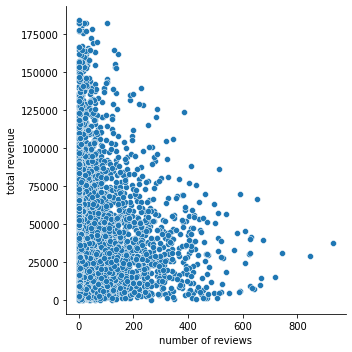

In [ ]:
sns.relplot(data=outliers_removed, x='number_of_reviews', y='total_revenue')
plt.xlabel('number of reviews')
plt.ylabel('total revenue')

plt.show()

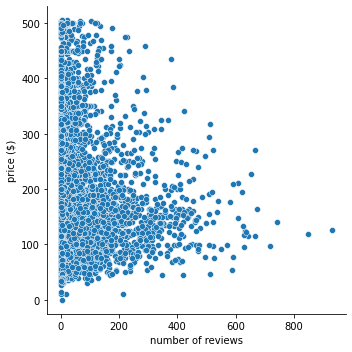

In [ ]:
sns.relplot(data=outliers_removed, x='number_of_reviews', y='price')
plt.xlabel('number of reviews')
plt.ylabel('price ($)')

plt.show()

# Recommendations
- Have a clear money goal to work up to.
- Forecast and map demand.
- Adjust your marketing for periods of low demand.
- Add in-demand amenities.

# Export to Google Sheet Report

In [ ]:
# # Mount to Google Sheets 
# from google.colab import auth
# auth.authenticate_user()

# # Import neccessary libraries -- Đi học syntax 
# import gspread
# from gspread_dataframe import set_with_dataframe
# from google.auth import default
# creds, _ = default()

# # Authorize Google Sheets API
# gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
# sh = gc.create('Airbnb_SanFrancisco')

In [ ]:
# def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
#     """gsheet_key (str): ID of Google Sheet File
#        worksheet_id (int): 0, 1, 2, ... 
#        data (DataFrame): data to write
#     """
#     sh = gc.open_by_key(gsheet_key)
    
#     # To create a new worksheet with 1000 rows and 26 columns
#     worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

#     # For writing to an existing worksheet
#     # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

#     set_with_dataframe(worksheet, data)

Tables to export:
- `outliers_removed`: Listings with outliers removed 
- `over_45K`: Listings making more than 45K a year
- `sf_rentals`: San Francisco's rents between June 2021 and June 2022
- `availability`: Booked and vacant calendar
- `pivoted_seasonality`: 30-day running total of daily rates


In [ ]:
# Export data to Google Sheets
# sf_rentals.reset_index(inplace=True)
# availability.reset_index(inplace=True)
# pivoted_seasonality.reset_index(inplace=True)

# export_data_to_new_sheet('1ZRi9J28lWg1g_eFfu58_5nOlWso5eLKbSR0QdlxslGY', 'Overview', outliers_removed)
# export_data_to_new_sheet('1ZRi9J28lWg1g_eFfu58_5nOlWso5eLKbSR0QdlxslGY', 'Rentals', sf_rentals)
# export_data_to_new_sheet('1ZRi9J28lWg1g_eFfu58_5nOlWso5eLKbSR0QdlxslGY', 'Top performers', over_45K)
# export_data_to_new_sheet('1ZRi9J28lWg1g_eFfu58_5nOlWso5eLKbSR0QdlxslGY', 'Availability', availability)
# export_data_to_new_sheet('1ZRi9J28lWg1g_eFfu58_5nOlWso5eLKbSR0QdlxslGY', 'Seasonality', pivoted_seasonality)